# Latin Hypercube Sampling example

Latin Hypercube Sampling is typically used to save computer processing time when running Monte Carlo simulations. Studies have shown that a well-performed LHS can cut down on processing time by up to 50 percent (versus a standard Monte Carlo importance sampling).

[Wikipedia link](https://en.wikipedia.org/wiki/Latin_hypercube_sampling)

[statisticshowto link](https://www.statisticshowto.com/latin-hypercube-sampling/)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os

def lhs_empir(data,nsample):
    m,nvar = data.shape
    ran=np.random.rand(nsample,nvar)
    s1 = []
    for i in np.arange(0,nsample):
        idx = np.random.permutation(nsample)
        P=((idx[i]-ran[i])/nsample)*100
        s=np.percentile(data,abs(P))
        s1.append(s[0])
    return(s1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

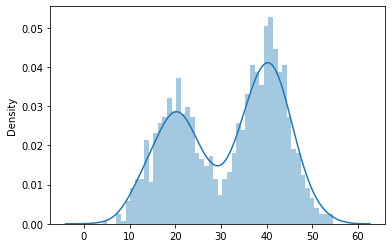

In [26]:
# generate a sample with a bimodal ditribution
sample1 = np.random.normal(loc=20, scale=5, size=500)
sample2 = np.random.normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))
# plot the histogram
sns.distplot(sample, bins=50)
# pyplot.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

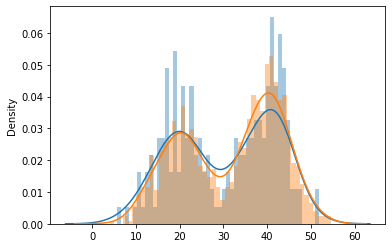

In [28]:
# create a sample of data (200 points) that preserves the original data distribution (1200 points)
data = lhs_empir(sample.reshape(-1,1), 200)
sns.distplot(data, bins=50)
sns.distplot(sample, bins=50)